In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
import seaborn as sns
import matplotlib.pyplot as plt
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# **1. K최근접이웃 회귀**

### 1-1. 필요한 데이터셋 가져오기

In [2]:
# 종이 Perch인 애들의 Length를 이용하여 Weight를 예측

cond = df['Species'] == 'Perch'
perch_data = df.loc[cond]

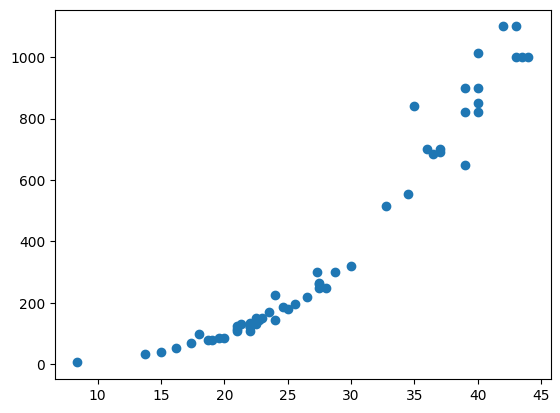

In [3]:
# Length2와 Weight의 산점도 그리기
plt.scatter(perch_data['Length2'], perch_data['Weight'])

### 1-2. 훈련데이터와 검증데이터 분류하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_data[['Length2']], perch_data[['Weight']])
# train_test_split(x,y,test_size,random_state) => test_size는 전체 데이터셋중 몇퍼센트를 테스트 데이터로 사용할건지
# random_state: 항상 똑같은 결과 도출

### 1-3. 모델 적합

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 1-4. 결정계수 R^2

In [8]:
knr.score(test_input, test_target)

0.982218900729

### 1-5. K의 개수 바꾸기

In [9]:
knr.n_neighbors = 10
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=10)

In [10]:
knr.score(test_input, test_target)

0.9813225202516083

### 1-6. 선형회귀 평가지표 (MAE, MSE, RMSE, R^2)
- MAE : (실제값 - 예측값)의 절대값을 평균
- MSE : (실제값 - 예측값)^2 의 평균
- RMSE : MSE에 루트씌운 값

In [11]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

In [12]:
#예측값
test_prediction = knr.predict(test_input)
#예측값(test_prediction)과 실제값(test_target)의 MAE
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

28.475


### **KNNRegression의 한계**
- 훈련 셋의 범위를 많이 벗어나는 샘플인 경우 정확하게 예측하기 어렵다


# **2.선형회귀**

### 2-1. 필요한 데이터셋 가져오기

In [13]:
perch_df = df.loc[df['Species']=='Perch']

In [14]:
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

### 2-2. 훈련데이터와 검증데이터 분류하기

In [15]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

### 2-3. 선형회귀 모델 적합

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

### 2-4. 결정계수 R^2

In [18]:
lr.score(test_input, test_target)

0.9123151369726694

### 2-5. 회귀계수와 y절편

In [19]:
# 회귀계수
lr.coef_

array([[37.3766661]])

In [20]:
# y절편
lr.intercept_

array([-654.30660293])

### 2-6. 산점도 위에 회귀선 그리기

In [21]:
import matplotlib.pyplot as plt

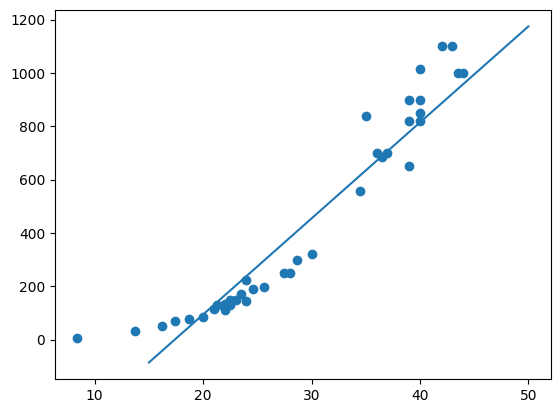

In [22]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15 * 36 -626, 50 * 36 -626])

### **2-7. 선형회귀의 문제점**
- 15보다 작으면 무게를 음수로 예측한다 => 선형을 곡석으로(다항회귀)

In [23]:
lr.predict([[14]]) 

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-131.03327748]])

# **3.다항회귀**
- y = ax^2 + bx + c
- 독립변수의 차수를 높인다
- 곡선 데이터에 적합

### 3-1. x^2 생성

In [37]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input.head()

,Length2,Length2_poly
88,22.0,484.00
124,43.0,1849.00
120,40.0,1600.00
119,40.0,1600.00
73,13.7,187.69


### 3-2. 다항회귀 모델 적합

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

### 3-3. 결정계수 R^2

In [42]:
lr.score(test_input, test_target)

0.9573322645834305

### 3-4. 예측

In [45]:
lr.predict([[2,4]]) # 선형회귀에서 무게가 음수로 나오는 문제를 해결

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[100.76256437]])

### 3-5. 회귀계수와 y절편

In [32]:
print(lr.coef_, lr.intercept_)
# y = 1.02x^2 -23.15x + 142

[[37.3766661]] [-654.30660293]


# **4. 다중회귀**
- 여러개의 독립변수를 사용
- ax + by + cz + d
- **특성공학** : 기존의 특성을 활용하여 새로운 특성을 뽑아내는 작업

### 4-1. 필요한 데이터셋 생성

In [33]:
perch_df = df.loc[df['Species']=='Perch']
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


### 4-2. 다양한 독립변수를 포함하는 데이터셋 생성

In [34]:
# Length2, Height, Width 사용
perch_full = perch_df[['Length2', 'Height', 'Width']] 
perch_weight = perch_df[['Weight']]

### 4-3. 훈련데이터와 검증데이터 분류하기

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

### 4-4. 모델 적합 

In [36]:
lr.fit(train_input, train_target)

LinearRegression()

### 4.5 결정계수 R^2

In [37]:
lr.score(test_input, test_target)

0.9651918321046119

### **4.6 특성공학_데이터 전처리(사이킷런 변환기)**
- 새로운 특성을 만들어주는 클래스
- 특성끼리 서로 곱한 항과, 특성을 제곱한 항이 추가된다

##### *훈련 세트와 검증세트 변환하기*

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly = PolynomialFeatures(include_bias = False) # include_bias = False : 1을 제외시킨다
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape  # (42,9) : 9개의 새로운 특성 생성

(42, 9)

In [42]:
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target)

0.9354316593102449

##### *특성을 더 많이 추가하기*

In [49]:
poly = PolynomialFeatures(degree = 5, include_bias = False) # 5제곱까지 추가하기
poly.fit(train_input) # fit은 train data에만 해도 된다
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape # (42,55) : 55개의 새로운 특성 생성

(42, 55)

In [51]:
lr.fit(train_poly, train_target)

LinearRegression()

In [52]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999998735
-388.08711480422267


과대적합 문제 발생
- 훈련세트에 대해 과대적합돼서 검증세트에서 음수가 나옴

# **5. 규제** 
- 모델이 훈련세트에 과대적합되지 않도록 계수를 줄이는 것
- 1. 정규화시키기(표준점수로 변환)
- 2. Ridge 회귀
- 3. Lasso 회귀

### *선형회귀, 릿지, 라쏘 비교*
- 선형회귀는 MSE(Mean Square Error)를 최소화하는 계수와 y절편을 찾는다
- Ridge 는 MSE + L2_norm * 람다 를 최소화하는 계수와 y절편을 찾는다 (L2_norm = 계수를 제곱한 값의 합)
- Lasso는 MSE + L1_norm * 람다 를 최소화하는 계수와 y절편을 찾는다 (L1_norm = 계수들의 절댓값의 합)
- Lasso는 계수의 크기를 0으로 만들어 변수를 제거할 수 있다

### 5-1. 정규화시키기

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 5-2. Ridge 회귀

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9932053825548521
0.9625762938820341


### 5-3. Lasso 회귀

In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9914375655453834
0.9666235813393991


In [60]:
lasso.coef_  #쓸모없는 계수를 0으로 만듬

array([  0.        ,   0.        ,   0.        ,  79.36087266,
         0.        ,   0.        ,   0.        ,  22.10474272,
        31.8457027 ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 120.78057003,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  87.02005793,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  14.05636274,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ])